In [1]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
import load_MNIST
from sklearn.preprocessing import StandardScaler
from collections import Counter

利用写好的load_MNIST模块中的load_data方法导入MNIST数据集
- Parameter
    - file_name:list 
        四个文件路径
        - list[0]: 训练集的图片数据文件路径
        - list[1]: 测试集的图片数据文件路径
        - list[2]: 训练集的标签文件路径
        - list[3]: 测试集的标签文件路径
- Return
    - train_data: numpy array
    - train_labels: list
    - test_data: numpy array
    - test_labels: list

In [21]:
file = ["C:/Users/wtser/Desktop/learnData/data/Mnist/train-images.idx3-ubyte",
       "C:/Users/wtser/Desktop/learnData/data/Mnist/t10k-images.idx3-ubyte",
       "C:/Users/wtser/Desktop/learnData/data/Mnist/train-labels.idx1-ubyte",
       "C:/Users/wtser/Desktop/learnData/data/Mnist/t10k-labels.idx1-ubyte"]  

train_data,train_labels,test_data,test_labels = load_MNIST.load_data(file)
#对数据进行预处理
# train_data[train_data>0] = 1
# test_data[test_data>0] = 1
# scaler = StandardScaler()
# train_data = scaler.fit_transform(train_data)
# test_data = scaler.fit_transform(test_data)

In [3]:
def init_center(k,col):
    center = np.random.randn(k,col)
    return center

In [4]:
def assign_points(data,center):
    assignment = []
    for i in range(data.shape[0]):
        assignment.append(np.argmin(np.sum((data[i]-center)**2,axis=1)))
    return np.array(assignment)
    

In [5]:
def update_centers(_center,data,assignment,k):
    center = np.array([np.ones((data.shape[1])) for i in range(k)],dtype=float)

    for i in range(k):
        if len(data[[assignment==i]])==0:
            center[i] = np.random.randn(data.shape[1])
            continue
        center[i] = np.mean(data[[assignment==i]],axis=0)
    return np.array(center,dtype=float)

In [6]:
def k_means(X,k,Y):
    
    centers = init_center(k,X.shape[1])
#     centers = w
    predict = assign_points(test_data[:500],centers)
    
    old_assignment = None
    assignment = assign_points(X,centers)
    epoch = 1
    for i in range(1000):
        epoch += 1
        old_assignment = assignment.tolist()
        centers = update_centers(centers,X,assignment,k)
        assignment = assign_points(X,centers)
    
    #利用投票法，统计训练数据中所有被标记为第i个聚类中心的数据中具有相同真实标签的数量
    #把第i个聚类中心设为该真实标签
    label = [0 for i in range(k)]
    
    for i in range(k):
        l = Y[assignment==i]
        if len(l) == 0:
            continue
        c = Counter(l)
        label[i] = c.most_common(1)[0][0]
    return centers,label


In [7]:
def assignment_point_byLabel(data,centers,label):
    assignment = []
    for i in range(data.shape[0]):
        assignment.append(label[np.argmin(np.sum((data[i]-center)**2,axis=1))])
    return np.array(assignment)

In [ ]:
center,label = k_means(train_data[:1000],10,train_labels[:1000])

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


In [10]:
print(center.shape)

(10, 784)


看下聚类效果

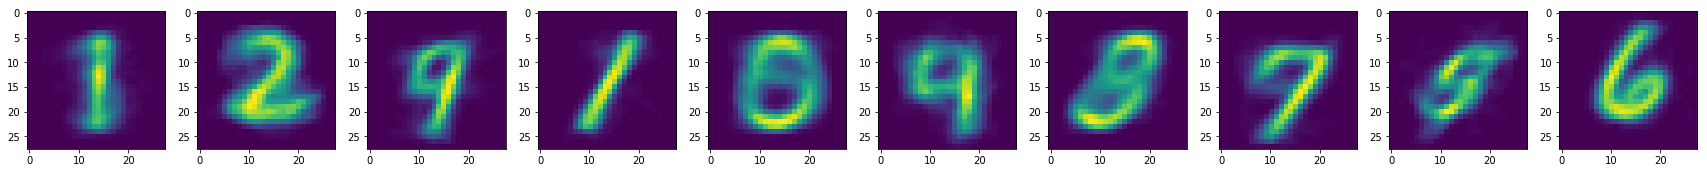

In [25]:
_center = np.array(center).reshape(len(center),28,28)
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
for i in range(10):
    plt.subplot(10,10,i+1)
    plt.imshow(_center[i])
plt.show()

In [24]:
pre = assignment_point_byLabel(test_data[:250],center,label)
print(classification_report(pre,test_labels[:250]))

             precision    recall  f1-score   support

          0       0.95      0.50      0.65        36
          1       1.00      0.58      0.73        59
          2       0.46      0.44      0.45        25
          3       0.04      0.08      0.06        12
          4       0.48      0.38      0.43        42
          5       0.08      0.29      0.12         7
          6       0.55      0.92      0.69        13
          7       0.34      0.62      0.44        16
          8       0.00      0.00      0.00         0
          9       0.30      0.20      0.24        40

avg / total       0.60      0.45      0.49       250



D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
